In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from scipy import stats 
sns.set_theme(style="darkgrid")

In [20]:
df = pd.read_excel('stats.xlsx',header=0)
df[['work_days', 'age', 'sex']] = pd.DataFrame(df['Количество больничных дней,Возраст,Пол'].str.split(',').tolist())
df = df[['work_days', 'age', 'sex']]
df.head()

,work_days,age,sex
0,5,39,"""Ж"""
1,4,54,"""М"""
2,4,26,"""М"""
3,5,42,"""М"""
4,4,29,"""М"""


In [21]:
dict_encoder = {'"М"':0, '"Ж"':1}
df['sex'] = df['sex'].map(dict_encoder)
df['work_days'] = df['work_days'].astype(int)
df['age'] = df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   work_days  237 non-null    int32
 1   age        237 non-null    int32
 2   sex        237 non-null    int64
dtypes: int32(2), int64(1)
memory usage: 3.8 KB


In [22]:
def test_hypothesis(sample_1, sample_2, alpha):
    n_1, n_2 = len(sample_1), len(sample_2)
    mean_1, mean_2 = np.mean(sample_1), np.mean(sample_2)
    var_1, var_2 = np.var(sample_1, ddof=1), np.var(sample_2, ddof=1)

    var = ( ((n_1-1)*var_1) + ((n_2-1)*var_2 ) ) / (n_1+n_2-2)
    std_error = np.sqrt(var * (1.0 / n_1 + 1.0 / n_2))
    # t-статистика
    t = abs(mean_1 - mean_2) / std_error
    print('t-статистика:',t)

    # t-статистика имеет распределение Стьюдента с dof степенями свободы
    dof = n_1 + n_2 - 2
    
    t_c = stats.t.ppf(q=1-alpha, df=dof)
    print("Критическое значение для односторонней гипотезы:",t_c)

    p = 1-stats.t.cdf(x=t, df=dof)
    print("P-значение:", p)

    if t_c > t:
        # Статистика не попадает в критическую область
        print(f'{t_c} > {t}')
        # Вероятность получить такое же или более экстремальное значение статистики больше, чем уровень значимости
        print(f'({p} > {alpha})')
        print('Вывод: нет оснований отвергать гипотезу')
    else:
        # Статистика попадает в критическую область
        print(f'{t_c} < {t}')
        # Вероятность получить такое же или более экстремальное значение статистики слишком мала
        print(f'({p} < {alpha})')
        print('Вывод: гипотеза отвергается в пользу альтернативы')


Гипотеза №1: Нет статистически значимой разницы в пропусках более 2 дней по болезни между мужчинами и женщинами


Альтернатива: Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин


Сравнение средних значений в двух выборках позволяет провести t-тест. Здесь и далее уровень значимости равен 5%

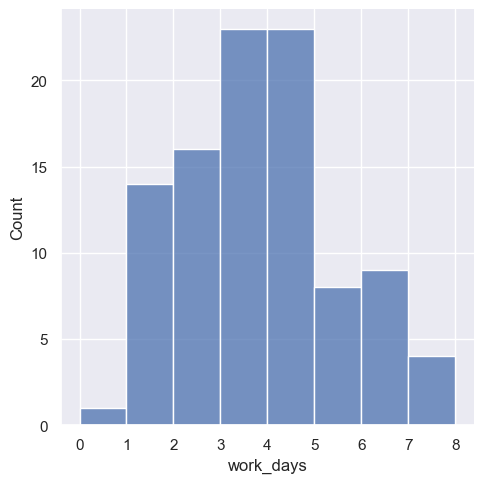

In [42]:
fem_workdays = df[df['sex']==1]['work_days']
sns.displot(data=fem_workdays, binwidth=1)

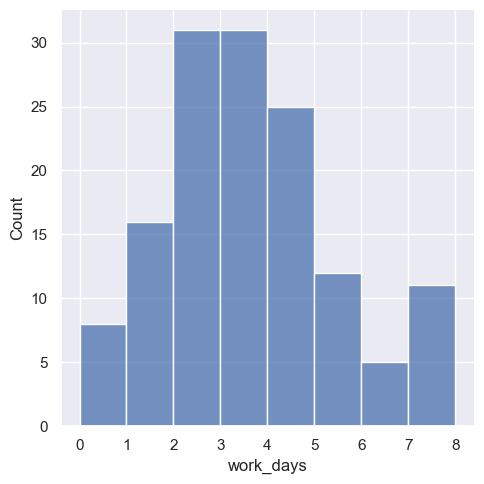

In [44]:
male_workdays = df[df['sex']==0]['work_days']
sns.displot(data=male_workdays, binwidth=1)

In [45]:
male_sample = df[(df['work_days'] > 2) & (df['sex']==0)]['work_days']
female_sample = df[(df['work_days'] > 2) & (df['sex']==1)]['work_days']
alpha = 0.05
test_hypothesis(male_sample, female_sample, alpha)

t-статистика: 0.41592499748510986
Критическое значение для односторонней гипотезы: 1.6551445337952997
P-значение: 0.339031660516415
1.6551445337952997 > 0.41592499748510986
(0.339031660516415 > 0.05)
Вывод: нет оснований отвергать гипотезу


Гипотеза №2: Нет статистически значимой разницы в пропусках более 2 дней по болезни между людьми старше и младше 35 лет

Альтернатива: Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег


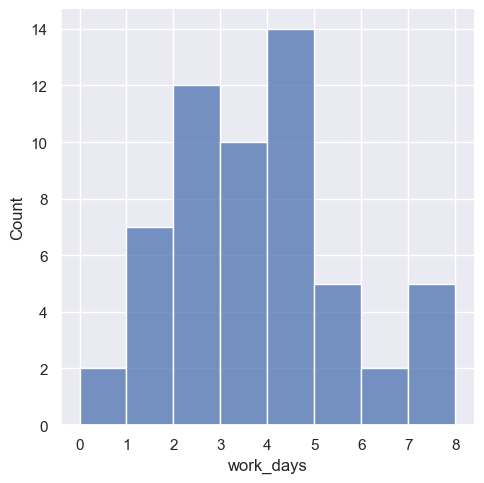

In [46]:
young_workdays = df[df['age']<=35]['work_days']
sns.displot(data=young_workdays, binwidth=1)

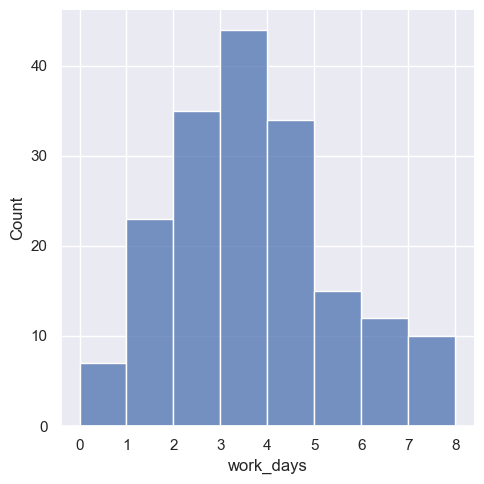

In [47]:
old_workdays = df[df['age']>35]['work_days']
sns.displot(data=old_workdays, binwidth=1)

In [28]:
young_sample = df[(df['work_days'] > 2) & (df['age'] <=3 5)]['work_days']
old_sample = df[(df['work_days'] > 2) & (df['age'] > 35)]['work_days']
test_hypothesis(young_sample, old_sample, alpha)

t-статистика: 0.7594348478395395
Критическое значение для односторонней гипотезы: 1.6551445337952997
P-значение: 0.22439614789859386
1.6551445337952997 > 0.7594348478395395
(0.22439614789859386 > 0.05)
Вывод: нет оснований отвергать гипотезу
